In [1]:
import os
from PIL import Image
import util.image_import as ii
from glob import glob
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from util.plots import plot_history
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


### Subtracting mean and normalizing to save pictures

images_pot        = glob(os.path.join("/home/mikkel/Documents/github/BSc-PRO/Classification/res_still/train/potato", "*.jpg"))
images_cat        = glob(os.path.join("/home/mikkel/Documents/github/BSc-PRO/Classification/res_still/train/catfood", "*.jpg"))
images_tab        = glob(os.path.join("/home/mikkel/Documents/github/BSc-PRO/Classification/res_still/train/table", "*.jpg"))

X_train = ii.images_to_numpy(images_pot, images_cat, images_tab)

ii.make_images_mean(X_train, "res_still", "res_still_mean")


In [2]:
train_path = 'res_still/train'
valid_path = 'res_still/valid'
test_path = 'res_still/test'

train_path_mean = 'res_still_mean/train'
valid_path_mean = 'res_still_mean/valid'
test_path_mean = 'res_still_mean/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,)
        #rotation_range=10,
        #vertical_flip=True,
        #horizontal_flip=True,
        #brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path_mean,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path_mean,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path_mean,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 355 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
# kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer).
model.add(Dense(512 ,kernel_regularizer=regularizers.l2(0.2)))
model.add(Activation('relu'))
model.add(Dense(3, kernel_regularizer=regularizers.l2(0.2)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               77070848  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 77,072,387
Trainable params: 77,072,387
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1000 // batch_size,
            epochs=10,
            validation_data=validation_generator,
            validation_steps=100 // batch_size)

Epoch 1/10
31/31 [==============================] - 12s 400ms/step - loss: 145.6364 - acc: 0.3964 - val_loss: 83.9282 - val_acc: 0.4062
Epoch 2/10
31/31 [==============================] - 9s 282ms/step - loss: 54.9937 - acc: 0.4195 - val_loss: 34.8476 - val_acc: 0.3971
Epoch 3/10
31/31 [==============================] - 8s 261ms/step - loss: 26.2703 - acc: 0.3993 - val_loss: 20.9340 - val_acc: 0.3382
Epoch 4/10
31/31 [==============================] - 8s 258ms/step - loss: 17.0241 - acc: 0.3933 - val_loss: 13.6293 - val_acc: 0.4559
Epoch 5/10
31/31 [==============================] - 8s 265ms/step - loss: 13.2225 - acc: 0.4001 - val_loss: 12.3839 - val_acc: 0.3958
Epoch 6/10
31/31 [==============================] - 9s 293ms/step - loss: 13.9374 - acc: 0.3872 - val_loss: 13.4707 - val_acc: 0.3824
Epoch 7/10
31/31 [==============================] - 9s 296ms/step - loss: 12.1107 - acc: 0.3937 - val_loss: 10.2619 - val_acc: 0.4559
Epoch 8/10
31/31 [==============================] - 8s 270ms

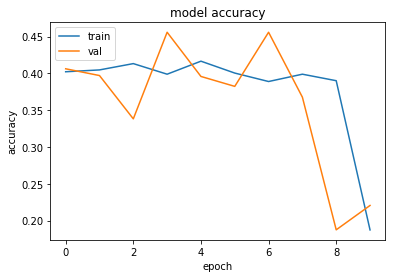

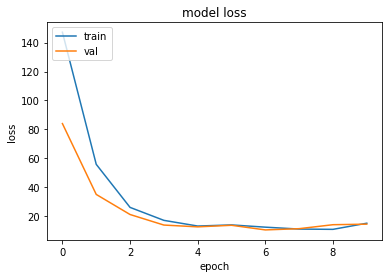

In [5]:
plot_history(history)

In [6]:
imgs, labels = next(test_generator)
img = Image.fromarray(imgs[1].astype('uint8'), 'RGB')
img.show()

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[15.285834312438965, 0.15625]